In [1]:
from IPython.display import display,HTML
c1,f1,fs1='#3311ff','Smokum',25
def dhtml(string,fontcolor=c1,font=f1,fontsize=fs1):
    display(HTML("""<style>
    @import 'https://fonts.googleapis.com/css?family="""\
    +font+"""&effect=3d-float';</style>
    <h1 class='font-effect-3d-float' 
    style='font-family:"""+font+\
    """; color:"""+fontcolor+\
    """; font-size:"""+str(fontsize)+"""px;'>
    %s</h1>"""%string))

In [2]:
dhtml('Code Modules & Functions')

In [3]:
import h5py,os,zipfile,cv2
import tensorflow as tf
import pandas as pd,numpy as np
import seaborn as sn,pylab as pl
from tensorflow.keras.preprocessing \
import image as tkimg

In [4]:
def images2array(files_path,img_size,preprocess):
    files_list=sorted(os.listdir(files_path))
    n,img_array=len(files_list),[]
    for i in range(n):
        if i%round(.1*n)==0:
            print('=>',end='',flush=True)
        img_path=files_path+files_list[i]
        if preprocess=='True':
            img=tkimg.load_img(img_path)
            img=tkimg.img_to_array(img)
            img=tkimg.smart_resize(
                img,(img_size,img_size))
        else:
            img=tkimg.load_img(
                img_path,target_size=(img_size,img_size))
            img=tkimg.img_to_array(img)
        img=np.expand_dims(img,axis=0)/255
        img_array.append(img)
    return np.array(np.vstack(img_array),
                    dtype='float32')
def labels2array(files_path):
    files_list=sorted(os.listdir(files_path))
    labels=[int(el[:2]) for el in files_list]
    label_set=list(set(labels))
    rd=dict(zip(label_set,
                list(range(len(label_set)))))
    labels=np.array([rd.get(x,x) for x in labels],
                    dtype=np.int32)
    return labels
def images2h5file(h5file,files_path,
                  img_size,names,preprocess='False'):
    images=images2array(files_path,img_size,preprocess)
    labels=labels2array(files_path)
    maxlen=max([len(n) for n in names])
    names=np.array([np.string_(name) 
                    for name in names])
    with h5py.File(h5file,'w') as f:
        f.create_dataset('images',data=images,compression="gzip")
        f.create_dataset('labels',data=labels,compression="gzip")
        f.create_dataset('names',data=names,
                         dtype='S%d'%maxlen,
                         compression="gzip")
        f.close()
    print('\nfile size: %s'%list(os.stat(h5file))[6])
#    with zipfile.ZipFile(h5file+'.zip','w',
#                         zipfile.ZIP_DEFLATED) as zf:
#        zf.write(h5file); zf.close()

In [5]:
def h5file2data(h5file):
#    with zipfile.ZipFile(h5file+'.zip','r') as zf:
#        zf.extractall(''); zf.close()
    with h5py.File(h5file,'r') as f:
        keys=list(f.keys())
        dhtml('file keys: '+', '.join(keys))
        images=np.array(f[keys[0]])
        labels=np.array(f[keys[1]])
        names=[el.decode('utf-8') 
               for el in f[keys[2]]]
        f.close()
    del h5file
    N=labels.shape[0]; n=int(.1*N)
    shuffle_ids=np.arange(N)
    np.random.RandomState(12).shuffle(shuffle_ids)
    images=images[shuffle_ids]
    labels=labels[shuffle_ids]
    x_test,x_valid,x_train=\
    images[:n],images[n:2*n],images[2*n:]
    y_test,y_valid,y_train=\
    labels[:n],labels[n:2*n],labels[2*n:]
    dhtml('function outputs: ')
    df=pd.DataFrame([[x_train.shape,x_valid.shape,x_test.shape],
                     [x_train.dtype,x_valid.dtype,x_test.dtype],
                     [y_train.shape,y_valid.shape,y_test.shape],
                     [y_train.dtype,y_valid.dtype,y_test.dtype]],
                    columns=['train','valid','test'],
                    index=['image shape','image type',
                           'label shape','label type'])
    display(df)
    dhtml('distribution of labels: ')
    df=pd.DataFrame(labels,columns=['label'])
    df['name']=[names[l] for l in labels]
    pl.figure(figsize=(7,5))
    sn.countplot(y='name',data=df,
                 palette='winter',alpha=.5)
    pl.show()
    return names,x_train,x_valid,x_test,\
           y_train,y_valid,y_test
def display_images(images,labels,names,n):
    fig=pl.figure(figsize=(10,n//2))
    randch=np.random.choice(
        len(labels),size=n,replace=False)
    for i,idx in enumerate(randch):
        ax=fig.add_subplot(
            n//4,4,i+1,xticks=[],yticks=[])
        ax.imshow(images[idx])
        label=names[labels[idx]]
        ax.set_title("{} * {}"\
                     .format(labels[idx],label),
                     fontsize=10)
    pl.show()

In [6]:
dhtml('Data Type #1 => Labeled PNG Files')

In [7]:
files_path1='../input/flower-color-images/'+\
            'flowers/flowers/'
img_size1=128
h5file1='Flowers'+str(img_size1)+'.h5'
names1=['phlox','rose','calendula','iris','Shasta daisy',
        'bellflower','viola','Goldquelle','peony','aquilegia',
        'rhododendron','passiflora','tulip','water lily',
        'lilium','veronica chamaedrys','cosmos',
        'aster annual','aster perennial','snowdrop']

In [8]:
images2h5file(h5file1,files_path1,img_size1,names1)

=>=>=>=>=>=>=>=>=>=>=>
file size: 39405806


,train,valid,test
image shape,"(483, 128, 128, 3)","(60, 128, 128, 3)","(60, 128, 128, 3)"
image type,float32,float32,float32
label shape,"(483,)","(60,)","(60,)"
label type,int32,int32,int32


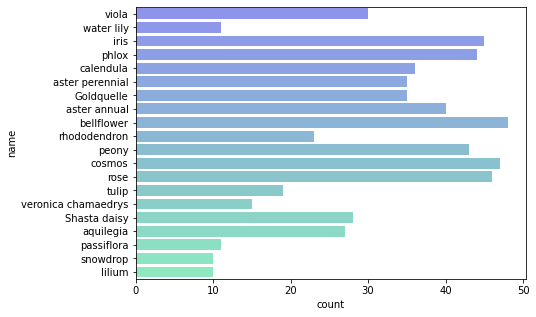

In [9]:
names1,x_train1,x_valid1,x_test1,\
y_train1,y_valid1,y_test1=h5file2data(h5file1)

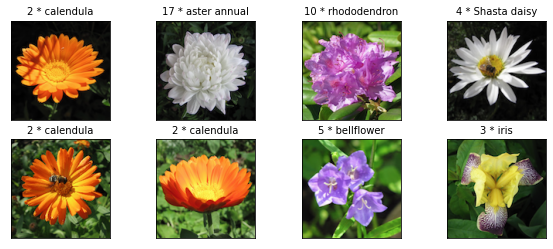

In [10]:
display_images(x_train1,y_train1,names1,8)

In [11]:
files_path2='../input/tomato-cultivars/'
img_size2=160
h5file2='TomatoCultivars'+str(img_size2)+'.h5'
names2=['Kumato','Beefsteak','Tigerella',
        'Roma','Japanese Black Trifele',
        'Yellow Pear','Sun Gold','Green Zebra',
        'Cherokee Purple','Oxheart','Blue Berries',
        'San Marzano','Banana Legs',
        'German Orange Strawberry','Supersweet 100']

In [12]:
images2h5file(h5file2,files_path2,img_size2,names2)

=>=>=>=>=>=>=>=>=>=>
file size: 71443360


,train,valid,test
image shape,"(622, 160, 160, 3)","(77, 160, 160, 3)","(77, 160, 160, 3)"
image type,float32,float32,float32
label shape,"(622,)","(77,)","(77,)"
label type,int32,int32,int32


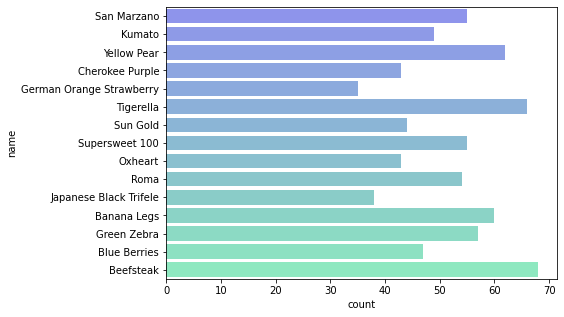

In [13]:
names2,x_train2,x_valid2,x_test2,\
y_train2,y_valid2,y_test2=h5file2data(h5file2)

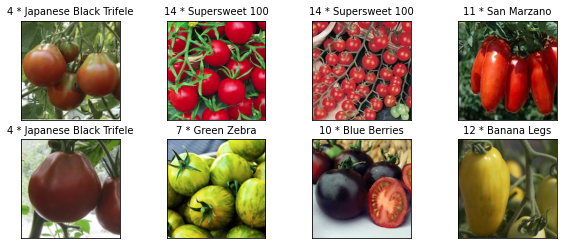

In [14]:
display_images(x_train2,y_train2,names2,8)

In [15]:
files_path3='../input/horse-breeds/'
img_size3,img_size3s=256,160
h5file3='HorseBreeds'+str(img_size3)+'.h5'
h5file3s='HorseBreeds'+str(img_size3s)+'.h5'
names3=['Akhal-Teke','Appaloosa','Orlov Trotter',
        'Vladimir Heavy Draft','Percheron',
        'Arabian','Friesian']

In [16]:
images2h5file(h5file3,files_path3,img_size3,names3)
images2h5file(h5file3s,files_path3,img_size3s,names3)

=>=>=>=>=>=>=>=>=>=>=>
file size: 126042375
=>=>=>=>=>=>=>=>=>=>=>
file size: 53370067


,train,valid,test
image shape,"(451, 256, 256, 3)","(56, 256, 256, 3)","(56, 256, 256, 3)"
image type,float32,float32,float32
label shape,"(451,)","(56,)","(56,)"
label type,int32,int32,int32


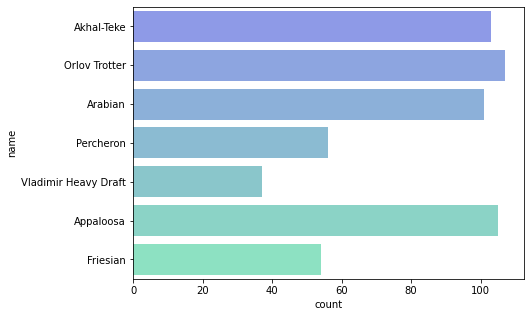

In [17]:
names3,x_train3,x_valid3,x_test3,\
y_train3,y_valid3,y_test3=h5file2data(h5file3)

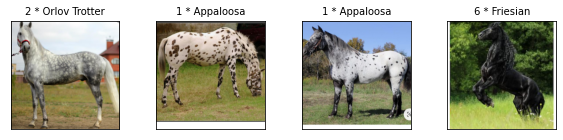

In [18]:
display_images(x_train3,y_train3,names3,4)

In [19]:
dhtml('Data Type #2 => Labeled Unformatted Files')

In [20]:
files_path4='../input/white-flowers/white_flowers/'
img_size4,img_size4s=192,128
h5file4='WhiteFlowers'+str(img_size4)+'.h5'
h5file4s='WhiteFlowers'+str(img_size4s)+'.h5'
names4=['jasmine','phlox','Shasta daisy','cherry',
        'viola','lily of the valley','apple tree',
        'snowdrop','perennial aster','blackberry',
        'strawberry','Nanking cherry','bellflower']

In [21]:
images2h5file(h5file4,files_path4,img_size4,
              names4,preprocess='True')
images2h5file(h5file4s,files_path4,img_size4s,
              names4,preprocess='True')

=>=>=>=>=>=>=>=>=>=>=>
file size: 158189894
=>=>=>=>=>=>=>=>=>=>=>
file size: 74723958


,train,valid,test
image shape,"(412, 192, 192, 3)","(51, 192, 192, 3)","(51, 192, 192, 3)"
image type,float32,float32,float32
label shape,"(412,)","(51,)","(51,)"
label type,int32,int32,int32


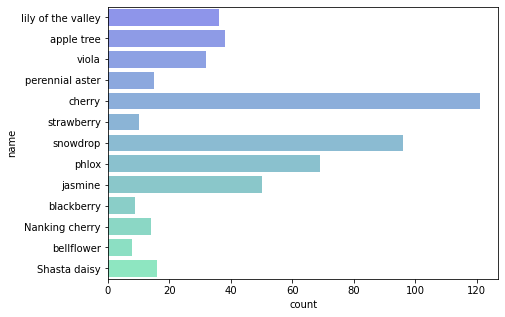

In [22]:
names4,x_train4,x_valid4,x_test4,\
y_train4,y_valid4,y_test4=h5file2data(h5file4)

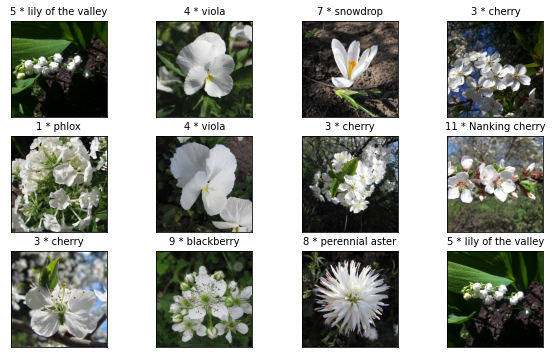

In [23]:
display_images(x_train4,y_train4,names4,12)